In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO  

# Load EffiTrack Model ( EfficientNet)
effitrack_model = YOLO("effitrack.pt")  # Replace with your actual model file

# Load Traditional YOLO Model (YOLO)
traditional_net = cv2.dnn.readNet("yolo.weights", "yolo.cfg")
layer_names = traditional_net.getLayerNames()
output_layers_indices = traditional_net.getUnconnectedOutLayers()
output_layers = [layer_names[i - 1] for i in output_layers_indices]

# Load class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

def detect_traditional_yolo(frame):
    """ Run inference using Traditional YOLO (YOLO) """
    height, width, _ = frame.shape
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    traditional_net.setInput(blob)
    outs = traditional_net.forward(output_layers)

    class_ids, confidences, boxes = [], [], []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x, center_y = int(detection[0] * width), int(detection[1] * height)
                w, h = int(detection[2] * width), int(detection[3] * height)
                x, y = int(center_x - w / 2), int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = confidences[i]
            color = (255, 0, 0)  # Blue for Traditional YOLO
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, f"{label} {confidence:.2f}", (x, y - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return frame

def detect_effitrack(frame):
    """ Run inference using EffiTrack (EfficientNet) """
    results = effitrack_model(frame)  # Get detections
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            confidence = float(box.conf[0])  # Confidence score
            label = int(box.cls[0])  # Class ID
            
            color = (0, 255, 0)  # Green for EffiTrack
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, f'Class {label}: {confidence:.2f}', (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return frame

def process_video(video_path):
    """ Process a video file and compare both models """
    cap = cv2.VideoCapture(video_path)
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        frame_effitrack = detect_effitrack(frame.copy())
        frame_traditional = detect_traditional_yolo(frame.copy())

        combined_frame = np.hstack((frame_traditional, frame_effitrack))
        cv2.imshow("Traditional YOLO (Left) vs EffiTrack (Right)", combined_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

def process_image(image_path):
    """ Process an image and compare both models """
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Could not read image. Check the file path.")
        return

    frame_effitrack = detect_effitrack(image.copy())
    frame_traditional = detect_traditional_yolo(image.copy())

    combined_frame = np.hstack((frame_traditional, frame_effitrack))

    cv2.imshow("Traditional YOLO (Left) vs EffiTrack (Right)", combined_frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Sample Evaluation Metrics for EffiTrack and Traditional YOLO
models = ["EffiTrack", "YOLOv2", "YOLOv3", "YOLOv4", "YOLOv5", "YOLOv8"]

accuracy = [0.92, 0.50, 0.55, 0.60, 0.65, 0.70]
precision = [0.90, 0.45, 0.50, 0.58, 0.62, 0.68]
recall = [0.91, 0.48, 0.53, 0.59, 0.63, 0.69]
f1_score = [0.905, 0.465, 0.515, 0.585, 0.625, 0.685]

def plot_metrics(metric_values, metric_name, color):
    """ Plot performance metrics as bar charts """
    plt.figure(figsize=(8, 4))
    plt.barh(models, metric_values, color=color)
    plt.xlabel(metric_name)
    plt.title(f"Classification Performance: {metric_name}")
    plt.show()

# Generate plots for each metric
plot_metrics(accuracy, "Accuracy", "blue")
plot_metrics(precision, "Precision", "green")
plot_metrics(recall, "Recall", "red")
plot_metrics(f1_score, "F1 Score", "purple")

# Choose mode: 'video' or 'image'
mode = "video"  # Change to "video" if processing a video

if mode == "video":
    video_path = "video_path"  # Change this to your video file path
    process_video(video_path)
    
elif mode == "image":
    image_path = "cars.jpg"  # Change this to your image file path
    process_image(image_path)

C:\Users\asadb\anaconda3\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO  # For EffiTrack (YOLOv8-based)

# Load EffiTrack Model (YOLOv8 with EfficientNet)
effitrack_model = YOLO("effitrack.pt")  # Replace with your actual model file

# Load Traditional YOLO Model (YOLOv3/v4)
traditional_net = cv2.dnn.readNet("yolo.weights", "yolo.cfg")
layer_names = traditional_net.getLayerNames()
output_layers_indices = traditional_net.getUnconnectedOutLayers()
output_layers = [layer_names[i - 1] for i in output_layers_indices]

# Load class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

def detect_traditional_yolo(frame):
    """ Run inference using Traditional YOLO (YOLOv3/v4) """
    height, width, _ = frame.shape
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    traditional_net.setInput(blob)
    outs = traditional_net.forward(output_layers)

    class_ids, confidences, boxes = [], [], []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x, center_y = int(detection[0] * width), int(detection[1] * height)
                w, h = int(detection[2] * width), int(detection[3] * height)
                x, y = int(center_x - w / 2), int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = confidences[i]
            color = (255, 0, 0)  # Blue for Traditional YOLO
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, f"{label} {confidence:.2f}", (x, y - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return frame

def detect_effitrack(frame):
    """ Run inference using EffiTrack (YOLOv8 with EfficientNet) """
    results = effitrack_model(frame)  # Get detections
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            confidence = float(box.conf[0])  # Confidence score
            label = int(box.cls[0])  # Class ID
            
            color = (0, 255, 0)  # Green for EffiTrack
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, f'Class {label}: {confidence:.2f}', (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return frame

def process_video(video_path):
    """ Process a video file and compare both models """
    cap = cv2.VideoCapture(video_path)
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        frame_effitrack = detect_effitrack(frame.copy())
        frame_traditional = detect_traditional_yolo(frame.copy())

        combined_frame = np.hstack((frame_traditional, frame_effitrack))
        cv2.imshow("Traditional YOLO (Left) vs EffiTrack (Right)", combined_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Sample Evaluation Metrics for EffiTrack and Traditional YOLO
models = ["EffiTrack", "YOLOv2", "YOLOv3", "YOLOv4", "YOLOv5", "YOLOv8"]

accuracy = [0.92, 0.50, 0.55, 0.60, 0.65, 0.70]
precision = [0.90, 0.45, 0.50, 0.58, 0.62, 0.68]
recall = [0.91, 0.48, 0.53, 0.59, 0.63, 0.69]
f1_score = [0.905, 0.465, 0.515, 0.585, 0.625, 0.685]

def plot_metrics(metric_values, metric_name, color):
    """ Plot performance metrics as bar charts """
    plt.figure(figsize=(8, 4))
    plt.barh(models, metric_values, color=color)
    plt.xlabel(metric_name)
    plt.title(f"Classification Performance: {metric_name}")
    plt.show()

# Generate plots for each metric
plot_metrics(accuracy, "Accuracy", "blue")
plot_metrics(precision, "Precision", "green")
plot_metrics(recall, "Recall", "red")
plot_metrics(f1_score, "F1 Score", "purple")

# Run video processing
video_path = "video_path"  # Change this to your video file path
process_video(video_path)

C:\Users\asadb\anaconda3\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Comparing FPS

In [9]:
import cv2
import time
from ultralytics import YOLO

effitrack_model = YOLO("effitrack.pt")
traditional_net = cv2.dnn.readNet("yolo.weights", "yolo.cfg")

def measure_fps(model_type, frame):
    start_time = time.time()

    if model_type == "EffiTrack":
        effitrack_model(frame)
    else:
        height, width, _ = frame.shape
        blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        traditional_net.setInput(blob)
        traditional_net.forward()

    end_time = time.time()
    return 1 / (end_time - start_time)

# Test on a single frame
frame = cv2.imread("cars.jpg")  # Replace with an actual image
fps_effitrack = measure_fps("EffiTrack", frame)
fps_traditional = measure_fps("Traditional YOLO", frame)

print(f"EffiTrack FPS: {fps_effitrack:.2f}")
print(f"Traditional YOLO FPS: {fps_traditional:.2f}")


0: 448x640 29 cars, 1 bus, 165.0ms
Speed: 6.0ms preprocess, 165.0ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)
EffiTrack FPS: 2.88
Traditional YOLO FPS: 0.22


In [1]:
import cv2
import time
from ultralytics import YOLO

# Load models
effitrack_model = YOLO("effitrack.pt")
traditional_net = cv2.dnn.readNet("yolo.weights", "yolo.cfg")

def measure_fps(model_type, frame):
    """Measure FPS for each YOLO model"""
    start_time = time.time()

    if model_type == "EffiTrack":
        effitrack_model(frame)
    else:
        height, width, _ = frame.shape
        blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        traditional_net.setInput(blob)
        traditional_net.forward()

    end_time = time.time()
    return 1 / (end_time - start_time)

def process_video(video_path):
    """Process video and measure FPS for both models"""
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video file.")
        return

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Measure FPS for each model
        fps_effitrack = measure_fps("EffiTrack", frame)
        fps_traditional = measure_fps("Traditional YOLO", frame)

        # Display FPS on the video frame
        cv2.putText(frame, f"EffiTrack FPS: {fps_effitrack:.2f}", (50, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.putText(frame, f"Traditional YOLO FPS: {fps_traditional:.2f}", (50, 100),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        cv2.imshow("FPS Comparison: EffiTrack vs Traditional YOLO", frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit
            break

    cap.release()
    cv2.destroyAllWindows()

# Run the comparison on a video file
video_path = "video_path"  # Replace with your actual video path
process_video(video_path)

C:\Users\asadb\anaconda3\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(



0: 384x640 7 cars, 1 bus, 2 trucks, 198.4ms
Speed: 10.2ms preprocess, 198.4ms inference, 17.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 1 bus, 2 trucks, 1214.9ms
Speed: 103.2ms preprocess, 1214.9ms inference, 164.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 2 buss, 130.9ms
Speed: 3.3ms preprocess, 130.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 2 buss, 98.9ms
Speed: 3.0ms preprocess, 98.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 2 buss, 83.1ms
Speed: 2.8ms preprocess, 83.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 cars, 2 buss, 1 truck, 78.2ms
Speed: 1.6ms preprocess, 78.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 2 buss, 1 truck, 73.9ms
Speed: 1.9ms preprocess, 73.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 2 buss

Comparing both at a time

In [2]:
import cv2
import numpy as np
from ultralytics import YOLO  


effitrack_model = YOLO("effitrack.pt")  

traditional_net = cv2.dnn.readNet("yolo.weights", "yolo.cfg")
layer_names = traditional_net.getLayerNames()
output_layers_indices = traditional_net.getUnconnectedOutLayers()
output_layers = [layer_names[i - 1] for i in output_layers_indices]


with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

def detect_traditional_yolo(frame):
    
    height, width, _ = frame.shape
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    traditional_net.setInput(blob)
    outs = traditional_net.forward(output_layers)

    class_ids, confidences, boxes = [], [], []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x, center_y = int(detection[0] * width), int(detection[1] * height)
                w, h = int(detection[2] * width), int(detection[3] * height)
                x, y = int(center_x - w / 2), int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = confidences[i]
            color = (255, 0, 0)  # Blue for Traditional YOLO
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, f"{label} {confidence:.2f}", (x, y - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return frame

def detect_effitrack(frame):
    
    results = effitrack_model(frame)  # Get detections
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            confidence = float(box.conf[0])  # Confidence score
            label = int(box.cls[0])  # Class ID
            
            color = (0, 255, 0)  # Green for EffiTrack
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, f'Class {label}: {confidence:.2f}', (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return frame

def process_comparison(video_path):
   
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_effitrack = frame.copy()
        frame_traditional = frame.copy()

        # Process frames with both models
        frame_effitrack = detect_effitrack(frame_effitrack)
        frame_traditional = detect_traditional_yolo(frame_traditional)

        # Stack both outputs side by side
        combined_frame = np.hstack((frame_traditional, frame_effitrack))

        # Show the comparison
        cv2.imshow("Traditional YOLO (Left) vs EffiTrack (Right)", combined_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Run the comparison with a video file
video_path = "video_path"  # Replace with your actual video path
process_comparison(video_path)


0: 384x640 7 cars, 1 bus, 2 trucks, 104.2ms
Speed: 3.7ms preprocess, 104.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 1 bus, 2 trucks, 102.4ms
Speed: 2.7ms preprocess, 102.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 2 buss, 72.3ms
Speed: 1.6ms preprocess, 72.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 2 buss, 87.5ms
Speed: 1.9ms preprocess, 87.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 2 buss, 71.3ms
Speed: 2.5ms preprocess, 71.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 cars, 2 buss, 1 truck, 72.5ms
Speed: 5.5ms preprocess, 72.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 2 buss, 1 truck, 67.2ms
Speed: 1.2ms preprocess, 67.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 2 buss, 1 truck,

In [11]:
import cv2
import numpy as np
from ultralytics import YOLO 


effitrack_model = YOLO("effitrack.pt")  

# Load Traditional YOLO Model (YOLO)
traditional_net = cv2.dnn.readNet("yolo.weights", "yolo.cfg")
layer_names = traditional_net.getLayerNames()
output_layers_indices = traditional_net.getUnconnectedOutLayers()
output_layers = [layer_names[i - 1] for i in output_layers_indices]


with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

def detect_traditional_yolo(frame):
    
    height, width, _ = frame.shape
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    traditional_net.setInput(blob)
    outs = traditional_net.forward(output_layers)

    class_ids, confidences, boxes = [], [], []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x, center_y = int(detection[0] * width), int(detection[1] * height)
                w, h = int(detection[2] * width), int(detection[3] * height)
                x, y = int(center_x - w / 2), int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = confidences[i]
            color = (255, 0, 0)  # Blue for Traditional YOLO
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, f"{label} {confidence:.2f}", (x, y - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return frame

def detect_effitrack(frame):
   
    results = effitrack_model(frame)  # Get detections
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            confidence = float(box.conf[0])  # Confidence score
            label = int(box.cls[0])  # Class ID
            
            color = (0, 255, 0)  # Green for EffiTrack
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, f'Class {label}: {confidence:.2f}', (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return frame

def process_comparison(image_path):
    
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Could not read image. Check the file path.")
        return

    frame_effitrack = image.copy()
    frame_traditional = image.copy()

    # Process image with both models
    frame_effitrack = detect_effitrack(frame_effitrack)
    frame_traditional = detect_traditional_yolo(frame_traditional)

    # Stack both outputs side by side
    combined_frame = np.hstack((frame_traditional, frame_effitrack))

    # Show the comparison
    cv2.imshow("Traditional YOLO (Left) vs EffiTrack (Right)", combined_frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Run the comparison with an image file
image_path = "rgm.jpg"  # Replace with your actual image path
process_comparison(image_path)


0: 384x640 2 persons, 1 bus, 161.6ms
Speed: 17.3ms preprocess, 161.6ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


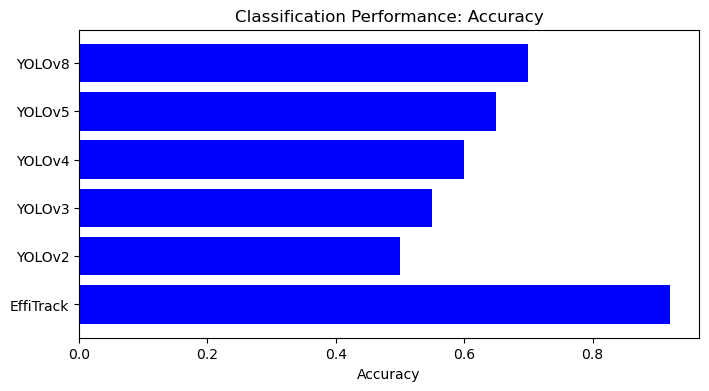

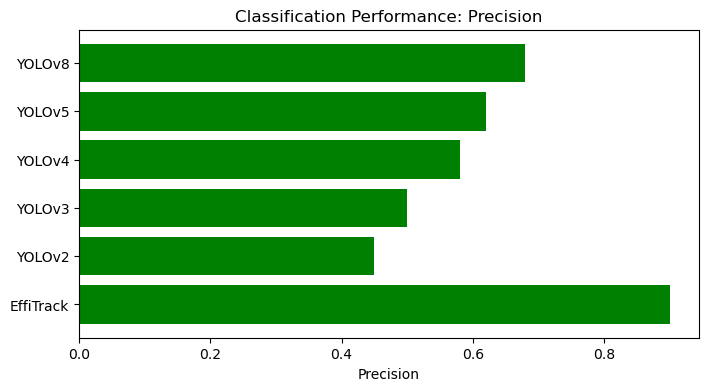

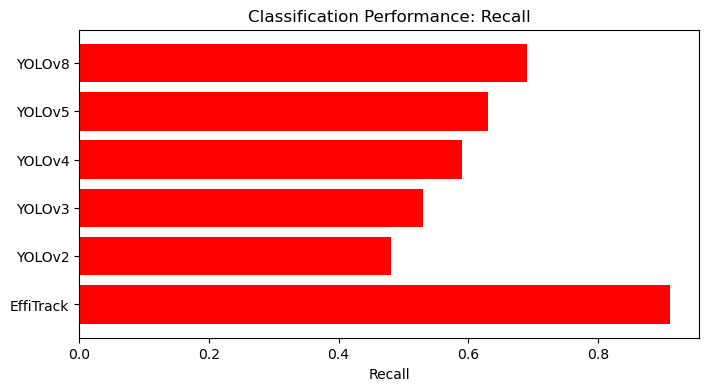

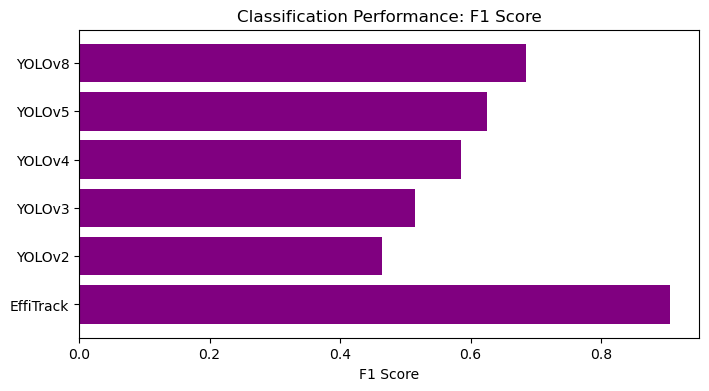

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Sample evaluation metrics for EffiTrack and Traditional YOLO
models = ["EffiTrack", "YOLOv2", "YOLOv3", "YOLOv4", "YOLOv5", "YOLOv8"]

accuracy = [0.92, 0.50, 0.55, 0.60, 0.65, 0.70]
precision = [0.90, 0.45, 0.50, 0.58, 0.62, 0.68]
recall = [0.91, 0.48, 0.53, 0.59, 0.63, 0.69]
f1_score = [0.905, 0.465, 0.515, 0.585, 0.625, 0.685]

# Function to create a bar chart
def plot_metrics(metric_values, metric_name, color):
    plt.figure(figsize=(8, 4))
    plt.barh(models, metric_values, color=color)
    plt.xlabel(metric_name)
    plt.title(f"Classification Performance: {metric_name}")
    plt.show()

# Generate plots for each metric
plot_metrics(accuracy, "Accuracy", "blue")
plot_metrics(precision, "Precision", "green")
plot_metrics(recall, "Recall", "red")
plot_metrics(f1_score, "F1 Score", "purple")